In [1]:
from tensorflow.keras.models import load_model

# モデル読み込み
model = load_model('resistor_model.h5')


2025-11-24 18:30:57.895740: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-11-24 18:30:57.895765: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-11-24 18:30:57.895768: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.66 GB
2025-11-24 18:30:57.895784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-24 18:30:57.895795: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
from pillow_heif import register_heif_opener
from PIL import Image
import os

# HEICを開けるように登録
register_heif_opener()

input_root = 'new_imgse_3'
output_root = 'new_images_3.1'

# 再帰的にすべてのフォルダ・ファイルを探索
for root, dirs, files in os.walk(input_root):
    for file in files:
        if file.lower().endswith(".heic"):
            # 入力パスと出力パスを構築
            input_path = os.path.join(root, file)
            relative_path = os.path.relpath(root, input_root)  # サブフォルダ構造を保つ
            output_dir = os.path.join(output_root, relative_path)
            os.makedirs(output_dir, exist_ok=True)

            # 出力ファイル名（.jpgに変換）
            jpg_filename = os.path.splitext(file)[0] + ".jpg"
            output_path = os.path.join(output_dir, jpg_filename)

            # 画像を開いて保存
            try:
                image = Image.open(input_path)
                image.save(output_path, format="JPEG")
                print(f"✅ {input_path} → {output_path}")
            except Exception as e:
                print(f"❌ エラー: {input_path}: {e}")


✅ new_imgse_3/23KR/IMG_7603.heic → new_images_3.1/23KR/IMG_7603.jpg
✅ new_imgse_3/100KR/IMG_7607.heic → new_images_3.1/100KR/IMG_7607.jpg
✅ new_imgse_3/33KR/IMG_7606.heic → new_images_3.1/33KR/IMG_7606.jpg
✅ new_imgse_3/1MR/IMG_7605.heic → new_images_3.1/1MR/IMG_7605.jpg
✅ new_imgse_3/3_3KR/IMG_7604.heic → new_images_3.1/3_3KR/IMG_7604.jpg


In [2]:
import os

DATA_DIR = 'img/resistor_images_augmented_2'  # 学習時と同じフォルダ

# フォルダ名からラベルを取得
labels = sorted([
    name for name in os.listdir(DATA_DIR)
    if os.path.isdir(os.path.join(DATA_DIR, name)) and not name.startswith('.')
])

# ラベル → インデックス辞書
label_to_index = {label: i for i, label in enumerate(labels)}

# インデックス → ラベル辞書（今回必要なもの）
index_to_label = {i: label for label, i in label_to_index.items()}


✅ IMG_7593.jpg: 予測=3_3KR, 正解=23KR
✅ IMG_7597.jpg: 予測=100KR, 正解=100KR
✅ IMG_7596.jpg: 予測=1MR, 正解=33KR
✅ IMG_7595.jpg: 予測=1MR, 正解=1MR
✅ IMG_7594.jpg: 予測=3_3KR, 正解=3_3KR


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/2904742033.py:66: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/2904742033.py:66: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/2904742033.py:66: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/2904742033.py:66: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yasuo/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/U

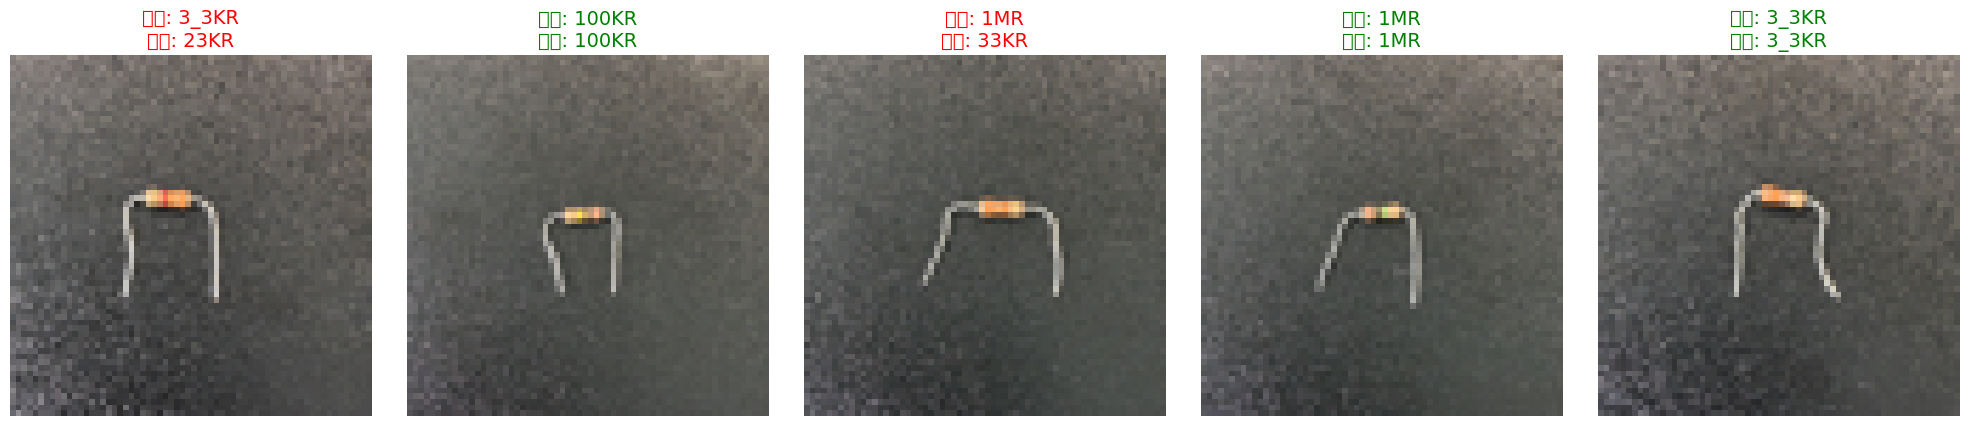

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# モデル，index_to_label，label_to_index が定義されている前提
IMG_SIZE = 64
input_root = 'new_images_1.1'
n = 10  # 表示数（最大）
rows = 2
cols = (n + 1) // rows

# 結果格納リスト
images = []
true_labels = []
pred_labels = []

# 各ラベルフォルダを探索
for label_name in os.listdir(input_root):
    label_dir = os.path.join(input_root, label_name)
    
    if not os.path.isdir(label_dir) or label_name.startswith('.'):
        continue
    if label_name not in label_to_index:
        print(f"⚠️ 無視: {label_name}（未知のラベル）")
        continue

    for file in os.listdir(label_dir):
        if file.lower().endswith('.jpg'):
            image_path = os.path.join(label_dir, file)
            try:
                # 前処理
                img = Image.open(image_path).convert('RGB').resize((IMG_SIZE, IMG_SIZE))
                img_array = np.array(img) / 255.0
                img_array = img_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)

                # 予測
                pred = model.predict(img_array, verbose=0)
                pred_index = np.argmax(pred[0])
                pred_label_name = index_to_label[pred_index]

                # 保存
                images.append(img)
                true_labels.append(label_name)
                pred_labels.append(pred_label_name)

                print(f"✅ {file}: 予測={pred_label_name}, 正解={label_name}")

                if len(images) >= n:
                    break

            except Exception as e:
                print(f"❌ エラー: {image_path}: {e}")
    if len(images) >= n:
        break

# 可視化
plt.figure(figsize=(cols * 4, rows * 4))
for i in range(len(images)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    color = 'green' if true_labels[i] == pred_labels[i] else 'red'
    plt.title(f'予測: {pred_labels[i]}\n正解: {true_labels[i]}', fontsize=14, color=color)

plt.tight_layout()
plt.show()


✅ IMG_7598.jpg: 予測=100KR, 正解=23KR
✅ IMG_7602.jpg: 予測=100KR, 正解=100KR
✅ IMG_7601.jpg: 予測=1MR, 正解=33KR
✅ IMG_7600.jpg: 予測=100KR, 正解=1MR
✅ IMG_7599.jpg: 予測=1MR, 正解=3_3KR


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/3049647564.py:66: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/3049647564.py:66: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/3049647564.py:66: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/3049647564.py:66: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


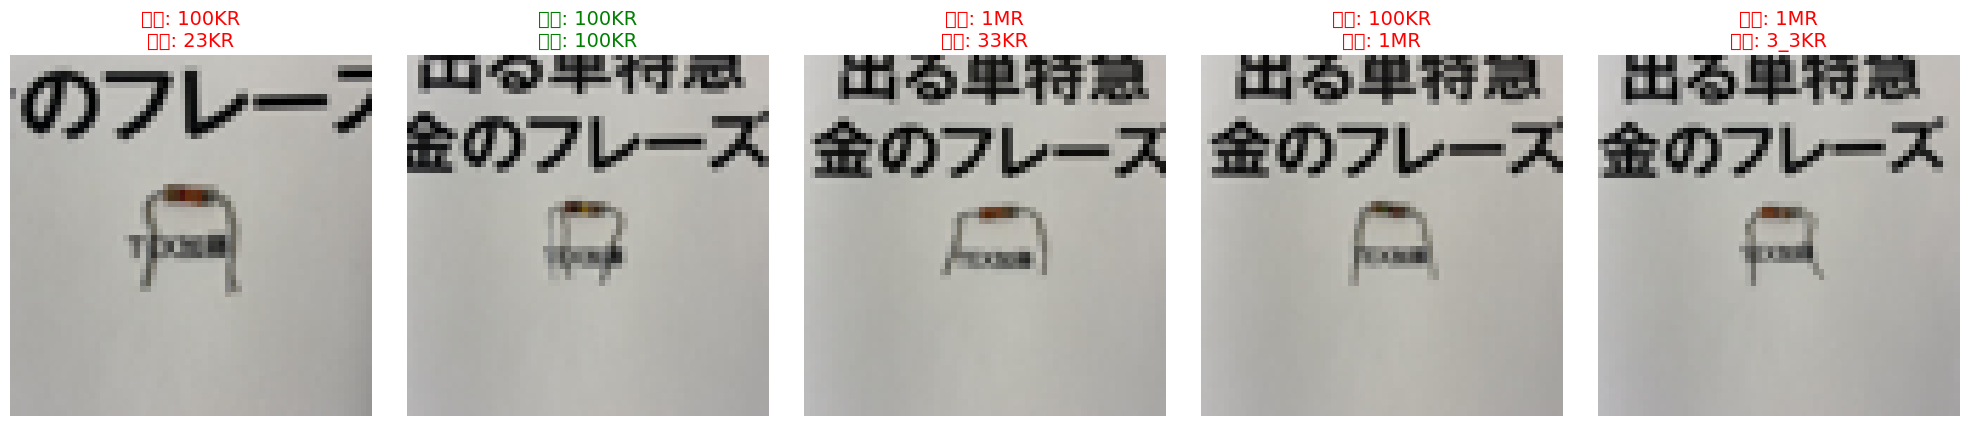

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# モデル，index_to_label，label_to_index が定義されている前提
IMG_SIZE = 64
input_root = 'new_images_2.1'
n = 10  # 表示数（最大）
rows = 2
cols = (n + 1) // rows

# 結果格納リスト
images = []
true_labels = []
pred_labels = []

# 各ラベルフォルダを探索
for label_name in os.listdir(input_root):
    label_dir = os.path.join(input_root, label_name)
    
    if not os.path.isdir(label_dir) or label_name.startswith('.'):
        continue
    if label_name not in label_to_index:
        print(f"⚠️ 無視: {label_name}（未知のラベル）")
        continue

    for file in os.listdir(label_dir):
        if file.lower().endswith('.jpg'):
            image_path = os.path.join(label_dir, file)
            try:
                # 前処理
                img = Image.open(image_path).convert('RGB').resize((IMG_SIZE, IMG_SIZE))
                img_array = np.array(img) / 255.0
                img_array = img_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)

                # 予測
                pred = model.predict(img_array, verbose=0)
                pred_index = np.argmax(pred[0])
                pred_label_name = index_to_label[pred_index]

                # 保存
                images.append(img)
                true_labels.append(label_name)
                pred_labels.append(pred_label_name)

                print(f"✅ {file}: 予測={pred_label_name}, 正解={label_name}")

                if len(images) >= n:
                    break

            except Exception as e:
                print(f"❌ エラー: {image_path}: {e}")
    if len(images) >= n:
        break

# 可視化
plt.figure(figsize=(cols * 4, rows * 4))
for i in range(len(images)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    color = 'green' if true_labels[i] == pred_labels[i] else 'red'
    plt.title(f'予測: {pred_labels[i]}\n正解: {true_labels[i]}', fontsize=14, color=color)

plt.tight_layout()
plt.show()


✅ IMG_7603.jpg: 予測=33KR, 正解=23KR
✅ IMG_7607.jpg: 予測=33KR, 正解=100KR
✅ IMG_7606.jpg: 予測=33KR, 正解=33KR
✅ IMG_7605.jpg: 予測=3_3KR, 正解=1MR
✅ IMG_7604.jpg: 予測=33KR, 正解=3_3KR


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/551115655.py:66: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/551115655.py:66: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/551115655.py:66: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_50217/551115655.py:66: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


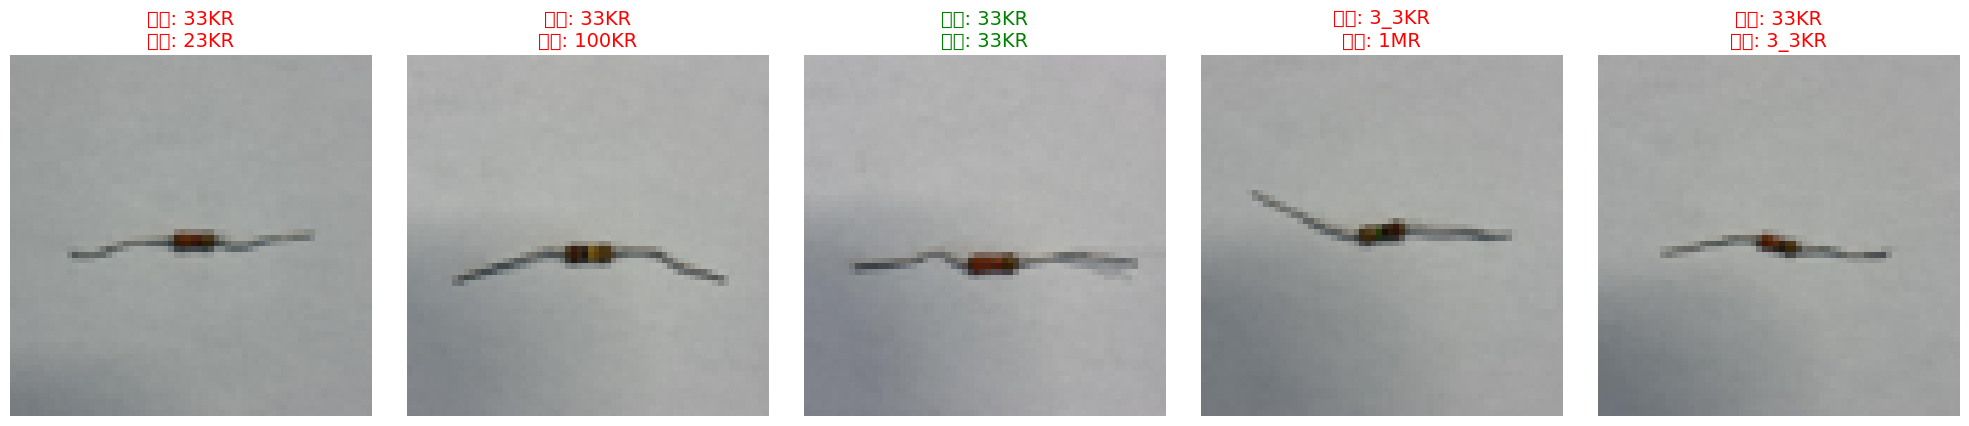

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# モデル，index_to_label，label_to_index が定義されている前提
IMG_SIZE = 64
input_root = 'new_images_3.1'
n = 10  # 表示数（最大）
rows = 2
cols = (n + 1) // rows

# 結果格納リスト
images = []
true_labels = []
pred_labels = []

# 各ラベルフォルダを探索
for label_name in os.listdir(input_root):
    label_dir = os.path.join(input_root, label_name)
    
    if not os.path.isdir(label_dir) or label_name.startswith('.'):
        continue
    if label_name not in label_to_index:
        print(f"⚠️ 無視: {label_name}（未知のラベル）")
        continue

    for file in os.listdir(label_dir):
        if file.lower().endswith('.jpg'):
            image_path = os.path.join(label_dir, file)
            try:
                # 前処理
                img = Image.open(image_path).convert('RGB').resize((IMG_SIZE, IMG_SIZE))
                img_array = np.array(img) / 255.0
                img_array = img_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)

                # 予測
                pred = model.predict(img_array, verbose=0)
                pred_index = np.argmax(pred[0])
                pred_label_name = index_to_label[pred_index]

                # 保存
                images.append(img)
                true_labels.append(label_name)
                pred_labels.append(pred_label_name)

                print(f"✅ {file}: 予測={pred_label_name}, 正解={label_name}")

                if len(images) >= n:
                    break

            except Exception as e:
                print(f"❌ エラー: {image_path}: {e}")
    if len(images) >= n:
        break

# 可視化
plt.figure(figsize=(cols * 4, rows * 4))
for i in range(len(images)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    color = 'green' if true_labels[i] == pred_labels[i] else 'red'
    plt.title(f'予測: {pred_labels[i]}\n正解: {true_labels[i]}', fontsize=14, color=color)

plt.tight_layout()
plt.show()
